In [71]:
# Importing libraries and data
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
# reading data
df = pd.read_csv('/Users/abay/Downloads/fifa_players.csv')

Dividing the positions into lines

In [72]:
# using def function to define in which line a position is 
df_line = df.copy() 
def line(position):
    if any(pos in position for pos in ['GK', 'CB', 'LB', 'RB']):
        return 'Defence'
    if any(pos in position for pos in ['CDM', 'CM', 'LM', 'RM', 'CAM']):
        return 'Midfield'
    else:
        return 'Attack'
    
# using apply(). function to apply the def function
df_line['positions'] = df_line['positions'].apply(line)
df_line.head(5)


,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,Attack,Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,Midfield,Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,Midfield,France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,Attack,Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,Defence,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


Finding the Min and Max rating for each lines : Defence, MidfielD, Attack

In [73]:
df_line_min = df_line.groupby('positions')['overall_rating'].min()
df_line_max = df_line.groupby('positions')['overall_rating'].max()
df_line_max

positions
Attack      94
Defence     91
Midfield    92
Name: overall_rating, dtype: int64

Visualising the findings

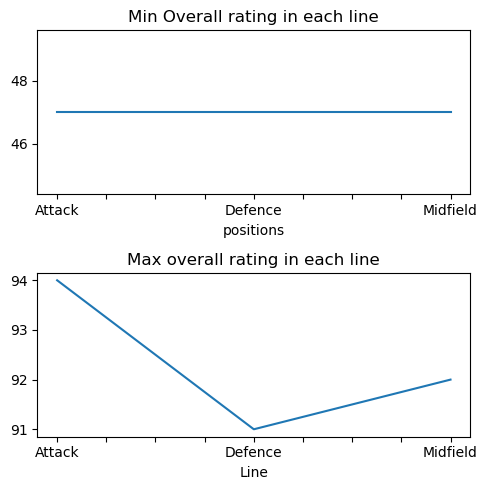

In [104]:
fig, ax = plt.subplots(2,1, figsize=(5, 5))


df_line_min.plot(kind='line', x = 'positions', y = 'overall_rating', ax=ax[0],legend=False)
ax[0].set_title('Min Overall rating in each line')


df_line_max.plot(kind='line', x = 'overall_rating', y = 'positions', ax=ax[1],legend=False)
ax[1].set_title('Max overall rating in each line')
ax[1].set_xlabel('Line')

plt.tight_layout()
plt.show()
